In [1]:
#In your first run,run this command to download stopwards
#nltk.download('stopwords')

In [140]:
#importing the libraries
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import re
from sklearn import *


In [141]:
#loading the file to dataframe usinf pandas read_csv() function and finding the shape of dataframe 
df=pd.read_csv("Project_data.csv")

In [142]:
#creating a new dataframe 
extract_data = pd.DataFrame(columns=['message','class'])

#adding data to these columns
extract_data['message']=df['message']
extract_data['class']=df['class']


In [143]:
#checking the class count
df['class'].value_counts()

valid    4825
spam      747
Name: class, dtype: int64

In [144]:
#replacing categorical values with numbers 
extract_data["class"].replace({"valid": 0, "spam": 1}, inplace=True)

In [145]:
def process_text(text):
    #remove punctuations
    text1=[char for char in text if char not in string.punctuation]
    text1=''.join(text1)
    
    #lowercase all characters
    text1=text1.lower()
    
    #remove hyperlinks
    text1=re.sub(r'http\S+',"",text1)
    
    #removing extra whitespaces
    text1=re.sub(r'\s+'," ",text1)
    
    
    #remove whitespaces on left and right
    text1=text1.lstrip()
    text1=text1.rstrip()
    
    #removing digits 
    text1=''.join([i for i in text1 if not i.isdigit()])
    
    #removing stopwards
    clean_data =[word for word in text1.split() if word.lower() not in stopwords.words('english')]
    
    return clean_data
    

In [146]:
# Text transformation ->  convert collection of text to matrix of tokens
#TfidfVectorizer.fit_transform is used to create vocabulary from the training dataset
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer(analyzer=process_text)
tfidf = TfidfVectorizer(max_features=3000)
messages = tfidf.fit_transform(extract_data['message']).toarray()


In [147]:
#split the data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train, y_test = train_test_split(messages,extract_data['class'],test_size =0.30, random_state=42)

#appling Undersampling method
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
x_train, y_train = rus.fit_resample(x_train, y_train)


In [148]:
def get_confusion_matrix(prediction,modelname):
    accuracy=round(accuracy_score(y_test,prediction),3)
    print("Accuracy : ",accuracy)
    cf_matrix=confusion_matrix(y_test, prediction)
    ax = sn.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
                fmt='.2%', cmap='Blues')
    ax.set_title(modelname+' Confusion Matrix\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

        ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

        ## Display the visualization of the Confusion Matrix.
    plt.show()

Accuracy :  0.962


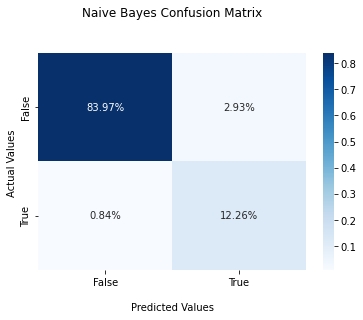

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1453
           1       0.81      0.94      0.87       219

    accuracy                           0.96      1672
   macro avg       0.90      0.95      0.92      1672
weighted avg       0.97      0.96      0.96      1672



In [149]:
#create and train Naive bayes classification
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB().fit(x_train,y_train)
predictions=classifier.predict(x_test)
get_confusion_matrix(predictions,"Naive Bayes")
print(classification_report(y_test,predictions, labels=[0,1]))

Accuracy :  0.976


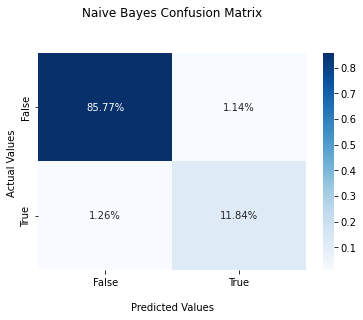

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1453
           1       0.91      0.90      0.91       219

    accuracy                           0.98      1672
   macro avg       0.95      0.95      0.95      1672
weighted avg       0.98      0.98      0.98      1672



In [120]:
#create and train Naive bayes classification
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB().fit(x_train,y_train)
predictions=classifier.predict(x_test)
get_confusion_matrix(predictions,"Naive Bayes")
print(classification_report(y_test,predictions, labels=[0,1]))

Accuracy :  0.96


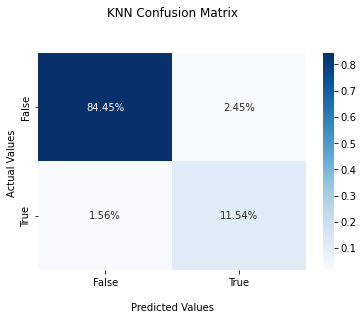

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1453
           1       0.82      0.88      0.85       219

    accuracy                           0.96      1672
   macro avg       0.90      0.93      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [151]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
get_confusion_matrix(prediction,"KNN")
print(classification_report(y_test,prediction, labels=[0,1]))

In [152]:
#this list will append the text, and prediction of each model
pred=[]

#this function will be used to predict real world scenario messages class
def predict_class(text):
    #process the text before using it
    transform_message=process_text(text)
    #list will return by calling process_text function so joining all strings in list
    text1=' '.join(char for char in transform_message)
    
    #converting the text to numeric vector to be used for predict function else will generated error
    v_input=tfidf.transform(transform_message)

    #first index of predict function will be class value so retrieving first index
    #predicting value using Naive Bayes
    Nb=classifier.predict(v_input)[0]
    
    #decoding values
    if Nb==0:
        Nb='valid'
    else:
        Nb='spam'
        
    #using KNN classifier to predict class
    knn=model.predict(v_input)[0]
    if knn==0:
        knn='valid'
    else:
        knn='spam'
        
    #appending text,Naive bayes prediction, knn_prediction in pred list
    pred.append([text,Nb,knn])

    

In [153]:
#now we will make new predictions on trained models
messages_list=[]
new_message="Go until jurong point, crazy.. Available only"
new_message1='Congratulations, you have won $1000 dollar gift card. go to http:bithshhd.com to claim now'
new_message2='Your IRS tax refund is pending acceptance. Must accept within 24 hours http:bit.ly/sdf'
message3='It is to inform you that we will have meeting tomorrow'
message4='Amazon is sending you $1562. please reply with you banking account and routing number to recieve your funds'
message5='Global crypto market capitalization rose 6.4% over the past week to $1.99 trillion, according to data from CoinMarketC Bitcoin ended the week 5.1% higher at $44,348.Ethereum, the second-largest cryptocurrency by market cap, topped $3,000 for the first time since Mar. 2, taking its market cap above that of traditional financial institutions like Mastercard and Bank of America.Waves broke into the top 50 coins by market cap after a 240% monthly gain, CoinDesk reported.'
message6='your account is temprory locked please login here http:bitlog.com'
messages_list=[new_message,new_message1,new_message2,message3,message4,message5]

In [154]:
for i in range(0,len(messages_list)):
    predict_class(messages_list[i])


In [157]:
d=[]
for i in range(0,len(pred)):
    d.append([pred[i][0],pred[i][1],pred[i][2]])
DF = pd.DataFrame(d, columns = ['text','Naive Bayes','KNN'])
print(DF)

                                                text Naive Bayes    KNN
0      Go until jurong point, crazy.. Available only       valid  valid
1  Congratulations, you have won $1000 dollar gif...        spam   spam
2  Your IRS tax refund is pending acceptance. Mus...       valid  valid
3  It is to inform you that we will have meeting ...       valid  valid
4  Amazon is sending you $1562. please reply with...       valid  valid
5  Global crypto market capitalization rose 6.4% ...       valid  valid
